# First let's plot CMB TT observational spectrum

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const

from classy import Class

In [32]:
# load dataset
dl = np.loadtxt("/Users/anilkandel/Documents/class_public-master/COM_PowerSpect_CMB-TT-full_R3.01.txt")
ell = dl[:, 0]
Dl  = dl[:, 1]
errDl_lower = dl[:, 2]
errDl_upper = dl[:, 3]

<ErrorbarContainer object of 3 artists>

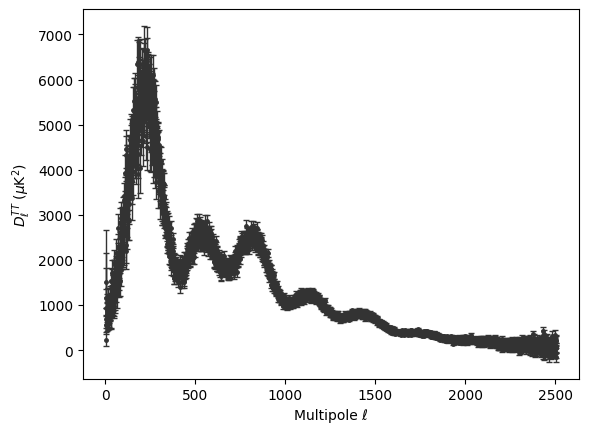

In [33]:
plt.xlabel("Multipole ℓ")
plt.ylabel(r"$D_\ell^{TT} \; (\mu\mathrm{K}^2)$")
plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2',elinewidth=1,ms=5,capthick=1,capsize = 2)


# Too many data clutter , so no proper visualization . So, binning data is taken below

In [34]:
# load dataset
dl = np.loadtxt("/Users/anilkandel/Documents/class_public-master/COM_PowerSpect_CMB-TT-binned_R3.01.txt")
ell = dl[:, 0]
Dl  = dl[:, 1]
errDl_lower = dl[:, 2]
errDl_upper = dl[:, 3]

<ErrorbarContainer object of 3 artists>

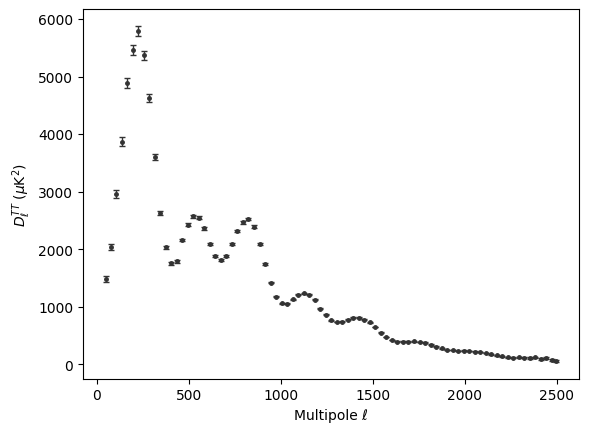

In [35]:
plt.xlabel("Multipole ℓ")
plt.ylabel(r"$D_\ell^{TT} \; (\mu\mathrm{K}^2)$")
plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2',elinewidth=1,ms=5,capthick=1,capsize = 2)


# Now test with LCDM cosmology 

In [36]:
# # LambdaCDM 6 parameters (Planck 18 + lensing + BAO bestfit) , library is already imported above.
fixed_settings = {
                'T_cmb':2.7255,
                'omega_b':0.02238280,
                'omega_cdm':0.1201075,
                'h':0.67810,
                'A_s':2.100549e-09, # amplitude of primodial power spectrum
                'n_s':0.9660499, # scalar spectral index
                'output':'tCl,pCl,lCl', # temperature, polarisation and lensing spectrum 
                'lensing':'yes' # say yes if you want CMB lensing, needs 'lCl'
                }

In [37]:
cosmo = Class()             # call class
cosmo.set(fixed_settings)   # input parameters 
cosmo.compute()             # compute cosmology
T_cmb = cosmo.T_cmb()       # get CMB temperature
raw_cl = cosmo.raw_cl(2500) # get raw Cl
cosmo.empty()               # clear input
cosmo.struct_cleanup()      # free the machine memory

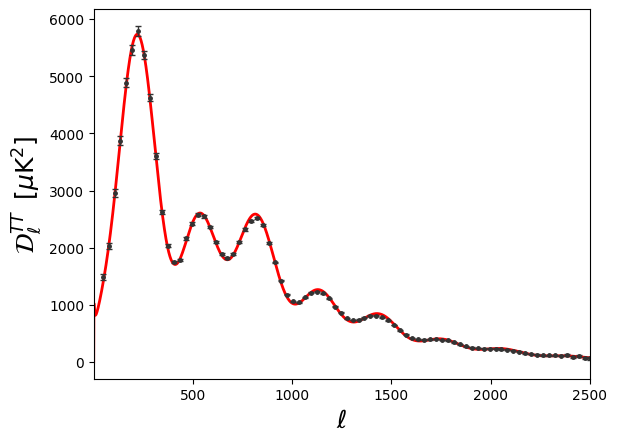

In [38]:
l = raw_cl['ell'][1:]
Cl_TT = raw_cl['tt'][1:]
factor = l*(l+1)/(2*np.pi)*T_cmb**2*1e12 # for D_l^TT is just l(l+1)/2pi * T_cmb^2 *1e12 times Cl_TT
plt.plot(l, factor*Cl_TT, color='r',lw=2)
plt.xlim(2, 2500)
plt.ylabel(r'$\mathcal{D}_\ell^{TT}\,\,\,[\mu\mathrm{K}^2]$',fontsize=18)
plt.xlabel(r"$\ell$",fontsize=18)

plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2',elinewidth=1,ms=5,capthick=1,capsize = 2)
plt.show()


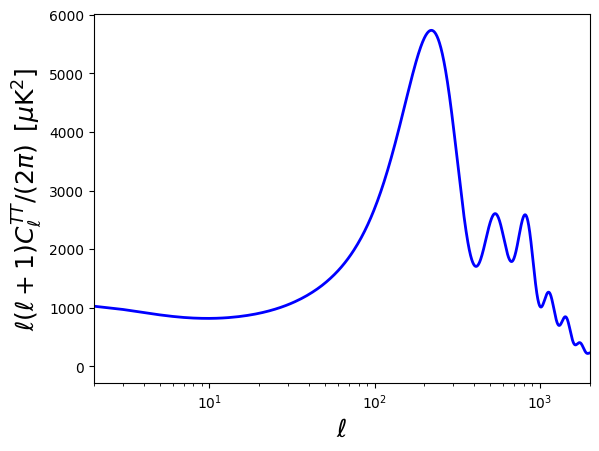

In [39]:
# Plotting CMB TT spectrum

l = raw_cl['ell'][1:]
Cl_TT = raw_cl['tt'][1:]

factor = l*(l+1)/(2*np.pi)*cosmo.T_cmb()**2*1e12

plt.semilogx(l, factor*Cl_TT, color='b',lw=2)
plt.xlim(2,2010)
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)\,\,\,[\mu\mathrm{K}^2]$',fontsize=18)

plt.xlabel(r"$\ell$",fontsize=18)
plt.show()